In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation

gunsales_population = pd.read_csv('./data/shootings_and_sales_per_pop.csv')

In [2]:
gunsales_population.head()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,...,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
0,2013,United States,316234505.0,267.0,881038.0,788328.0,1,31029.0,26137.0,693076.0,...,0.084431,278.602741,249.285890,9.812022,8.265069,219.165205,785.249541,0.005060,0.012333,0.003795
1,2013,United States,316234505.0,375.0,770872.0,703223.0,2,31163.0,22709.0,664252.0,...,0.118583,243.765936,222.373899,9.854396,7.181063,210.050450,726.853320,0.004427,0.014230,0.003795
2,2013,United States,316234505.0,376.0,683266.0,700873.0,3,23878.0,23817.0,695386.0,...,0.118899,216.063076,221.630780,7.550726,7.531436,219.895675,694.774278,0.007906,0.023717,0.006008
3,2013,United States,316234505.0,665.0,533674.0,554003.0,4,18624.0,21136.0,517224.0,...,0.210287,168.758940,175.187398,5.889300,6.683648,163.557105,538.352069,0.008222,0.016443,0.005376
4,2013,United States,316234505.0,619.0,445522.0,436674.0,5,16057.0,15605.0,449993.0,...,0.195741,140.883424,138.085501,5.077561,4.934629,142.297249,450.441042,0.005692,0.031306,0.007589


In [3]:
gunsales_population.columns

Index(['year', 'state', 'population', 'admin', 'handgun', 'long_gun', 'month',
       'multiple', 'other', 'permit', 'totals', 'killed', 'killed_max',
       'injured', 'incidents', 'injured_max', 'affected_max',
       'affected_over_10', 'killed_ave', 'injured_ave', 'admin_pop',
       'handgun_pop', 'long_gun_pop', 'multiple_pop', 'other_pop',
       'permit_pop', 'totals_pop', 'killed_pop', 'injured_pop',
       'incidents_pop'],
      dtype='object')

In [4]:
united_states_totals = gunsales_population[gunsales_population.state ==  "United States"]
united_states_totals.head()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,...,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
0,2013,United States,316234505.0,267.0,881038.0,788328.0,1,31029.0,26137.0,693076.0,...,0.084431,278.602741,249.285890,9.812022,8.265069,219.165205,785.249541,0.005060,0.012333,0.003795
1,2013,United States,316234505.0,375.0,770872.0,703223.0,2,31163.0,22709.0,664252.0,...,0.118583,243.765936,222.373899,9.854396,7.181063,210.050450,726.853320,0.004427,0.014230,0.003795
2,2013,United States,316234505.0,376.0,683266.0,700873.0,3,23878.0,23817.0,695386.0,...,0.118899,216.063076,221.630780,7.550726,7.531436,219.895675,694.774278,0.007906,0.023717,0.006008
3,2013,United States,316234505.0,665.0,533674.0,554003.0,4,18624.0,21136.0,517224.0,...,0.210287,168.758940,175.187398,5.889300,6.683648,163.557105,538.352069,0.008222,0.016443,0.005376
4,2013,United States,316234505.0,619.0,445522.0,436674.0,5,16057.0,15605.0,449993.0,...,0.195741,140.883424,138.085501,5.077561,4.934629,142.297249,450.441042,0.005692,0.031306,0.007589


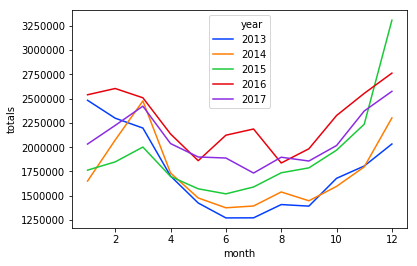

In [5]:
# Requires seaborn 9.0
# install seaborn==0.9.0
palette = sns.color_palette("bright", 5)
sns.lineplot(x="month", y="totals",
    hue="year", palette = palette,
    data=united_states_totals)

# Style works to show all years but hue doesn't... Any advice regarding this would be helpful

# Because these are government issued, could the request times and times these are issued differ?
# Or is this simply seasonality.


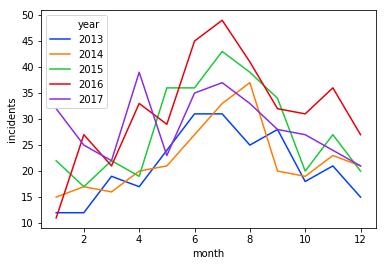

In [6]:
sns.lineplot(x="month", y="incidents",
             hue="year", palette = palette,
             data=united_states_totals)

# Once incidents are fixed, it would be interesting to look if there is a seasonality in mass shootings as well.
# Less people outside in winter? I remeber there being something similar to this in New York.

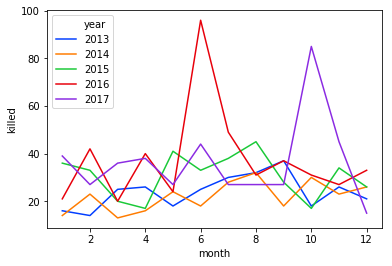

In [7]:
sns.lineplot(x="month", y="killed",
             hue="year",palette = palette,
             data=united_states_totals)

# Not much seasonality appears on the graph of those killed nationally by mass shootings. 
# There is although a similar spike in 2016 where guns were purchased in June and July following a mass shooting?
# Orlando Night club shooting...

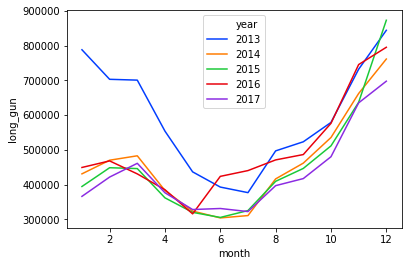

In [8]:
sns.lineplot(x="month", y="long_gun",
             hue="year",palette = palette,
             data=united_states_totals)

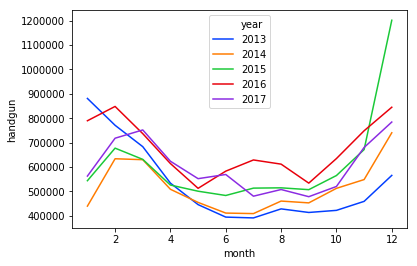

In [9]:
sns.lineplot(x="month", y="handgun",
             hue="year",palette = palette,
             data=united_states_totals)

In [10]:
dates = pd.DataFrame({"month": united_states_totals.month,
                      "year": united_states_totals.year,
                      "day": 1
                     })


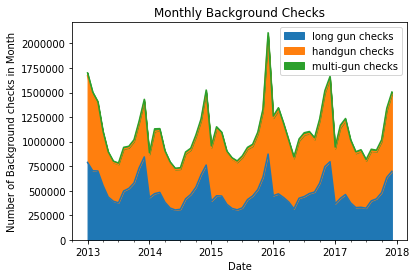

In [11]:
just_gun_sales = pd.DataFrame({"date": pd.to_datetime(dates),
                              "long gun checks": united_states_totals.long_gun,
                               "handgun checks": united_states_totals.handgun,
                               "multi-gun checks": united_states_totals.multiple
                              })
stacked_check_plot = just_gun_sales.plot.area(x="date", title="Monthly Background Checks")
stacked_check_plot.set(xlabel="Date", ylabel="Number of Background checks in Month")
stacked_check_plot

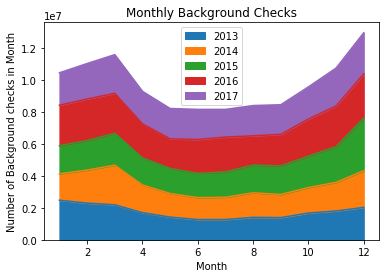

In [33]:
just_gun_sales = pd.DataFrame({"month": np.unique(united_states_totals.month.values),
                              "2013": united_states_totals["totals"][united_states_totals["year"] == 2013].values,
                               "2014": united_states_totals["totals"][united_states_totals["year"] == 2014].values,
                               "2015": united_states_totals["totals"][united_states_totals["year"] == 2015].values,
                                "2016": united_states_totals["totals"][united_states_totals["year"] == 2016].values,
                                "2017": united_states_totals["totals"][united_states_totals["year"] == 2017].values
                              })


stacked_check_plot = just_gun_sales.plot.area(x="month", title="Monthly Background Checks")
stacked_check_plot.set(xlabel="Month", ylabel="")
stacked_check_plot

In [20]:
states_only = gunsales_population[gunsales_population.state !=  "United States"]

united_states_totals["totals"][united_states_totals["year"] == 2013]

0     2483230.0
1     2298561.0
2     2197116.0
3     1702455.0
4     1424450.0
5     1270817.0
6     1271571.0
7     1408468.0
8     1392423.0
9     1679099.0
10    1805759.0
11    2032755.0
Name: totals, dtype: float64